In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
df = pd.read_csv("../etl/Loan_Default_knn_final.csv")
df.head()

,ID,business_or_commercial,loan_amount,rate_of_interest,term,interest_only,property_value,income,credit_score,age,ltv,dtir1,status
0,24890,1,116500.0,3.583333,360,1,118000.0,1740.0,758,0,98.728814,45.0,1
1,24891,1,406500.0,4.560000,360,1,508000.0,9480.0,834,1,80.019685,46.0,0
2,24892,1,456500.0,4.250000,360,1,658000.0,11880.0,587,2,69.376900,42.0,0
3,24893,1,696500.0,4.000000,360,1,758000.0,10440.0,602,0,91.886544,39.0,0
4,24894,1,706500.0,3.990000,360,1,1008000.0,10080.0,864,1,70.089286,40.0,0


## Split data to train vs test

In [3]:
X = df.drop(['ID','status'], axis=1)
y = df['status'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scaling data

In [4]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
filename = 'X_scaler.sav'
joblib.dump(X_scaler, filename)

['X_scaler.sav']

## Train model

In [8]:
model_rf = RandomForestClassifier(n_estimators=80)
model_rf.fit(X_train_scaled, np.ravel(y_train))

RandomForestClassifier(n_estimators=80)

In [9]:
filename = 'rf.sav'
joblib.dump(model_rf, filename)

['rf.sav']

## Performance matrix

In [10]:
predictions = model_rf.predict(X_test_scaled)
print(f"Training Data Score: {model_rf.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {model_rf.score(X_test_scaled, y_test)}")
print(classification_report(y_test,predictions))

Training Data Score: 0.9999600706749054
Test Data Score: 0.932171413170425
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     28008
           1       0.91      0.64      0.75      5385

    accuracy                           0.93     33393
   macro avg       0.92      0.82      0.86     33393
weighted avg       0.93      0.93      0.93     33393



              precision    recall  f1-score       support
0              0.935333  0.987396  0.960660  28008.000000
1              0.907737  0.644940  0.754098   5385.000000
accuracy       0.932171  0.932171  0.932171      0.932171
macro avg      0.921535  0.816168  0.857379  33393.000000
weighted avg   0.930883  0.932171  0.927350  33393.000000


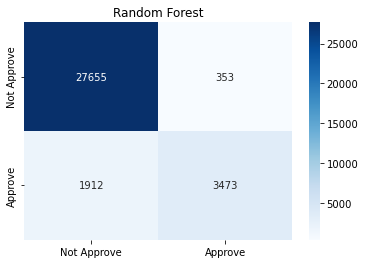

In [11]:
target = ['Not Approve','Approve']

ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions))
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='g')

# labels, title and ticks
ax.set_title('Random Forest')
ax.xaxis.set_ticklabels(target)
ax.yaxis.set_ticklabels(target)

report_rf = classification_report(y_test,predictions, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()
print(report_rf_df)

## Hyperparameter tuning

In [13]:
# Create the GridSearchCV model
param_grid = {
    'max_features': ["auto","sqrt"],
    'n_estimators': [50, 80, 90]
}
grid = GridSearchCV(model_rf, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid.fit(X_train_scaled, np.ravel(y_train))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END max_features=auto, n_estimators=50;, score=0.928 total time=  17.8s
[CV 2/5] END max_features=auto, n_estimators=50;, score=0.925 total time=  16.9s
[CV 3/5] END max_features=auto, n_estimators=50;, score=0.924 total time=  16.9s
[CV 4/5] END max_features=auto, n_estimators=50;, score=0.922 total time=  17.5s
[CV 5/5] END max_features=auto, n_estimators=50;, score=0.924 total time=  17.8s
[CV 1/5] END max_features=auto, n_estimators=80;, score=0.930 total time=  27.1s
[CV 2/5] END max_features=auto, n_estimators=80;, score=0.924 total time=  27.2s
[CV 3/5] END max_features=auto, n_estimators=80;, score=0.928 total time=  27.2s
[CV 4/5] END max_features=auto, n_estimators=80;, score=0.928 total time=  27.4s
[CV 5/5] END max_features=auto, n_estimators=80;, score=0.925 total time=  27.3s
[CV 1/5] END max_features=auto, n_estimators=90;, score=0.930 total time=  30.3s
[CV 2/5] END max_features=auto, n_estimators=90;,

GridSearchCV(estimator=RandomForestClassifier(n_estimators=80),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 80, 90]},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'max_features': 'auto', 'n_estimators': 80}
0.9270690869736198


In [16]:
model_rf_gridsearch = RandomForestClassifier(max_features='auto' ,n_estimators=80)
model_rf_gridsearch.fit(X_train_scaled, np.ravel(y_train))

RandomForestClassifier(n_estimators=80)

## Performance matrix

In [17]:
predictions2 = model_rf_gridsearch.predict(X_test_scaled)
print(f"Training Data Score: {model_rf_gridsearch.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {model_rf_gridsearch.score(X_test_scaled, y_test)}")
print(classification_report(y_test,predictions2))

Training Data Score: 0.9999500883436317
Test Data Score: 0.9313928068756925
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     28008
           1       0.91      0.64      0.75      5385

    accuracy                           0.93     33393
   macro avg       0.92      0.81      0.86     33393
weighted avg       0.93      0.93      0.93     33393



              precision    recall  f1-score       support
0              0.934717  0.987147  0.960217  28008.000000
1              0.905611  0.641411  0.750951   5385.000000
accuracy       0.931393  0.931393  0.931393      0.931393
macro avg      0.920164  0.814279  0.855584  33393.000000
weighted avg   0.930023  0.931393  0.926470  33393.000000


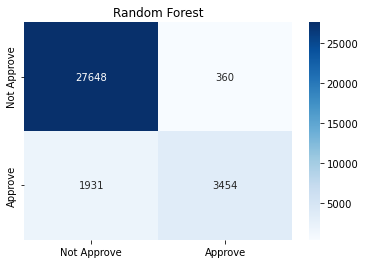

In [18]:
target = ['Not Approve','Approve']

ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions2))
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='g')

# labels, title and ticks
ax.set_title('Random Forest')
ax.xaxis.set_ticklabels(target)
ax.yaxis.set_ticklabels(target)

report_rf = classification_report(y_test, predictions2, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()
print(report_rf_df)

In [19]:
filename = 'rf_gridsearch.sav'
joblib.dump(model_rf_gridsearch, filename)

['rf_gridsearch.sav']